In [1]:
% matplotlib inline 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns




In [2]:
# import Galton Families data

gf_data=pd.read_csv('/Users/scheo/Documents/PythonPractice/cookbook-data/GaltonFamilies.csv')

In [8]:
gf_data.head()

#del gf_data['Unnamed: 0']



,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


In [9]:
gf_data.describe()

,father,mother,midparentHeight,children,childNum,childHeight
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,69.197109,64.089293,69.206773,6.171306,3.585653,66.745931
std,2.476479,2.290886,1.802370,2.729025,2.361410,3.579251
min,62.000000,58.000000,64.400000,1.000000,1.000000,56.000000
25%,68.000000,63.000000,68.140000,4.000000,2.000000,64.000000
50%,69.000000,64.000000,69.248000,6.000000,3.000000,66.500000
75%,71.000000,65.875000,70.140000,8.000000,5.000000,69.700000
max,78.500000,70.500000,75.430000,15.000000,15.000000,79.000000


In [13]:
gf_data.pivot_table(columns='childNum',aggfunc='median')

childNum,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
childHeight,70.00,68.50,67.00,65.500,64.50,64.00,63.35,63.00,63.250,63.00,62.00,61.00,60.00,58.00,57.00
children,4.00,5.00,5.00,6.000,7.00,7.00,8.00,8.00,10.000,11.00,11.00,15.00,15.00,15.00,15.00
father,69.50,69.50,69.50,69.200,69.00,69.00,69.00,69.00,68.750,68.00,68.50,66.00,66.00,66.00,66.00
midparentHeight,69.18,69.26,69.25,69.248,69.26,69.36,69.35,69.18,69.015,68.56,68.85,64.86,64.86,64.86,64.86
mother,64.00,64.00,64.00,64.000,64.00,64.50,64.25,64.00,64.500,64.00,65.00,59.00,59.00,59.00,59.00


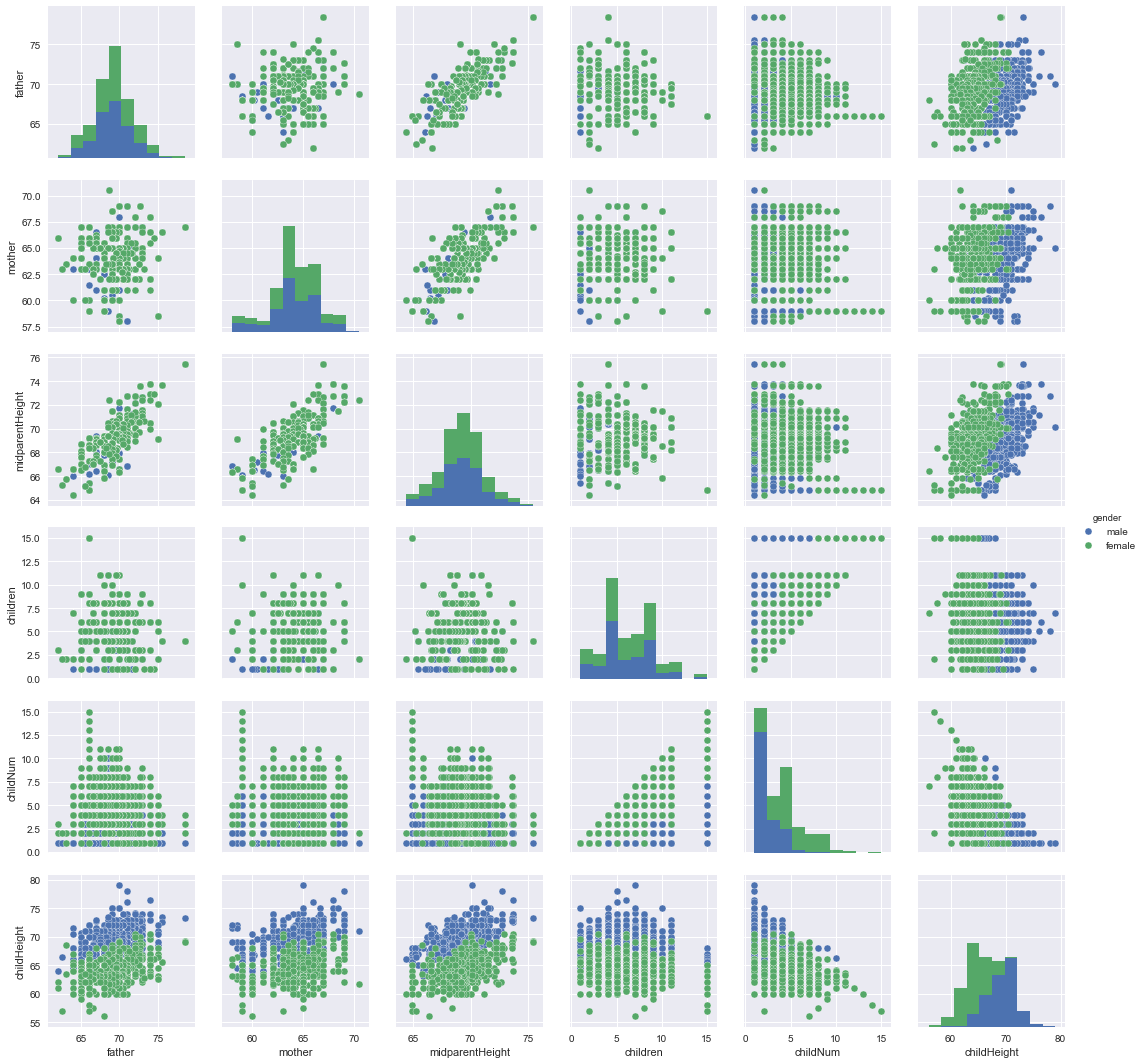

In [15]:
# let's visualize the data:

#sns.pairplot(gf_data)

# we can look at it by gender too:
sns.pairplot(gf_data,hue='gender')

# or by 'childNum'

In [18]:
female_num=len(gf_data[gf_data['gender']=='female'])
male_num=len(gf_data[gf_data['gender']=='male'])

print('there are ', female_num ,' females and ', male_num, 'males' )

there are  453  females and  481 males


In [3]:
np.median(gf_data['midparentHeight'])

69.248000000000005

In [4]:
# subsetting tall vs short groups based on parent's average height 
tall_group= gf_data[gf_data['midparentHeight']>= 69.25]

short_group=gf_data[gf_data['midparentHeight']< 69.25]

In [5]:
np.mean(tall_group['childHeight'])

67.63211206896557

In [6]:
np.mean(short_group['childHeight'])

65.87106382978726

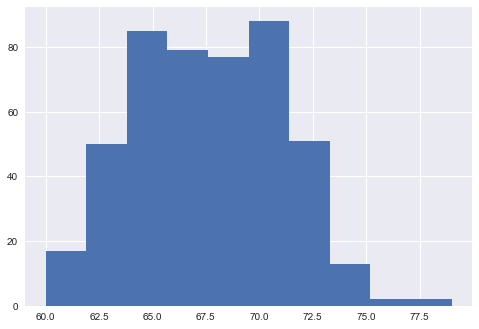

In [8]:
tall_group['childHeight'].hist()

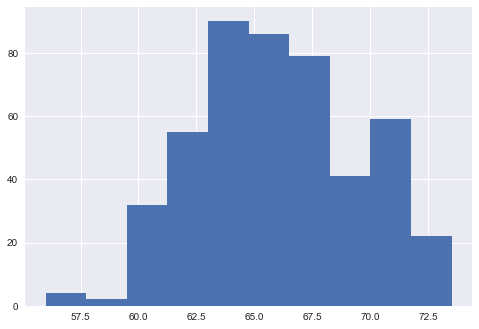

In [9]:
short_group['childHeight'].hist()

In [10]:
parent_ttest=stats.ttest_ind(tall_group['childHeight'],short_group['childHeight'])

In [15]:
# Note that, the t-test is essentially measuring the disitrbution of difference between two samples. 
#If the hypothesis is true, then we would expect that the t-stats to be close to 0 
parent_ttest.pvalue
print(' The probability of observing test stats of ', parent_ttest.statistic, ' is about ', parent_ttest.pvalue)

 The probability of observing test stats of  7.75267020549  is about  2.35066261532e-14


In [16]:
# Build a very simple regression model

linear_model=stats.linregress(x=gf_data['midparentHeight'],y=gf_data['childHeight'])

In [17]:
m_model=linear_model.intercept
s_model=linear_model.slope
print('The regression model has slope', s_model, ' and intercept ', m_model)

The regression model has slope 0.637360896969  and intercept  22.6362405496


In [18]:
# use the slope and intercept to create a linear model:
x=gf_data['midparentHeight']
y_hat=s_model*x + m_model
y=gf_data['childHeight']

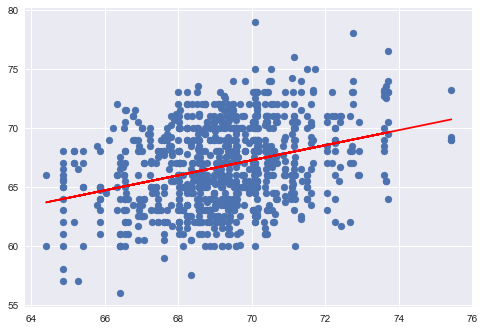

In [20]:
plt.scatter(x,y,)
plt.plot(x,y_hat,color='red')

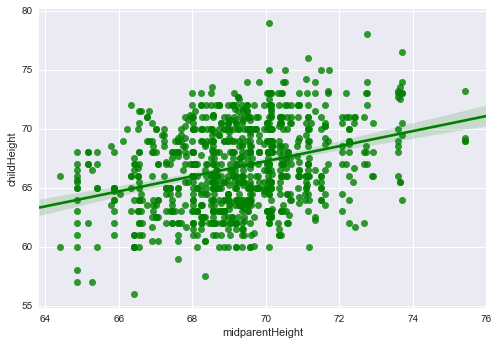

In [31]:
# There is another way to do this using seaborn:

sns.regplot(x='midparentHeight',y='childHeight',data=gf_data,color='green')

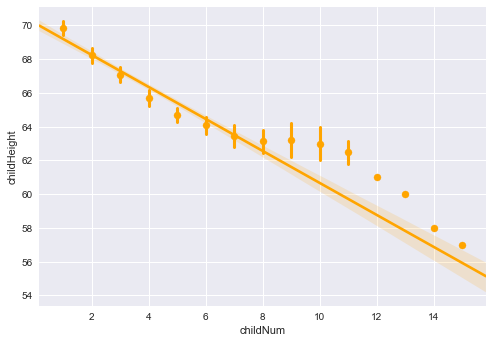

In [34]:
# we can also look at how discrete x variables affects the model too
sns.regplot(x='childNum',y='childHeight',data=gf_data,x_estimator=np.mean,color='orange')

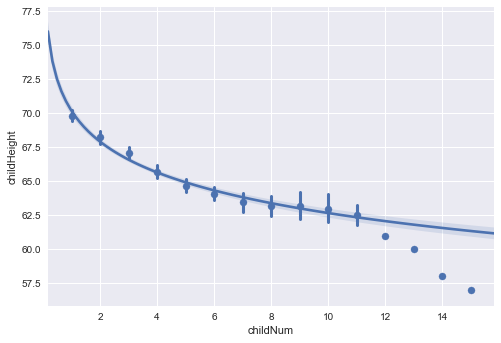

In [45]:
sns.regplot(x='childNum',y='childHeight',data=gf_data,x_estimator=np.mean,logx=True)

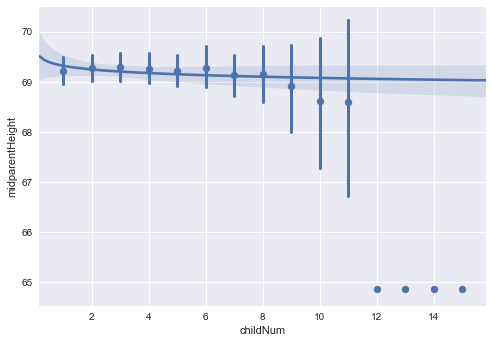

In [46]:
sns.regplot(x='childNum',y='midparentHeight',data=gf_data,x_estimator=np.mean,logx=True)

In [48]:
corr_mat=gf_data.corr()

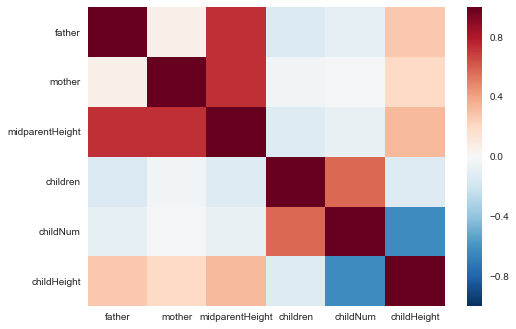

In [50]:
sns.heatmap(corr_mat)